In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import statistics

In [3]:
import seaborn as sns
df=sns.load_dataset('tips')

In [48]:
# Descriptive statistics
print("Descriptive Statistics:\n", df.describe())

Descriptive Statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
np.mean(df['total_bill'])

19.78594262295082

In [6]:
np.median(df['total_bill'])

17.795

In [7]:
statistics.mode(df['total_bill'])

13.42

<Axes: ylabel='total_bill'>

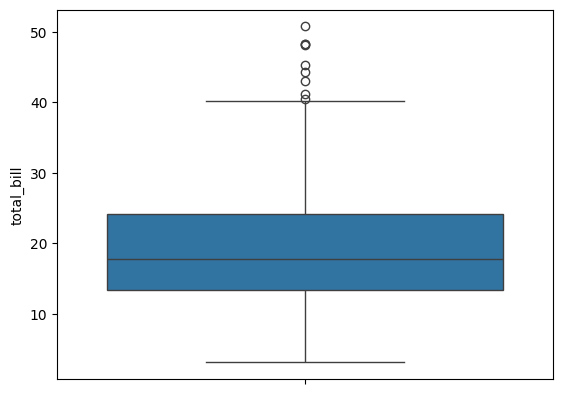

In [8]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

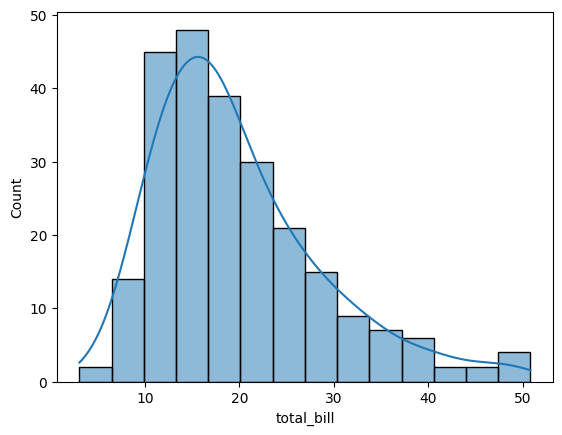

In [9]:
sns.histplot(df['total_bill'],kde=True)

Correlation Matrix:
               sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


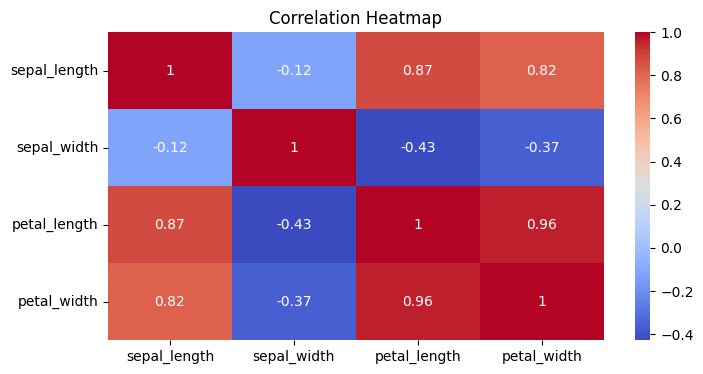

In [52]:
# Correlation matrix
correlation_matrix = df.iloc[:, :-1].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
df1=sns.load_dataset('iris')

In [11]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

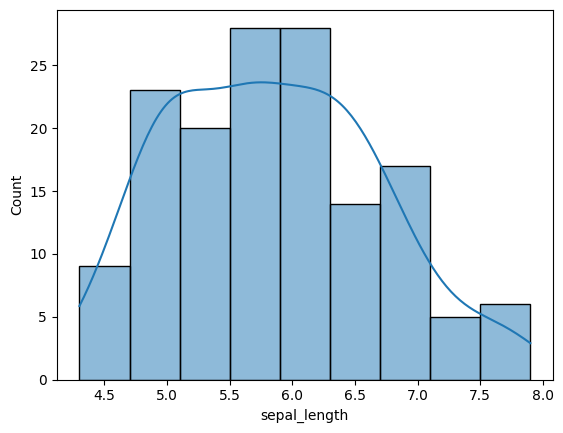

In [12]:
sns.histplot(df1['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

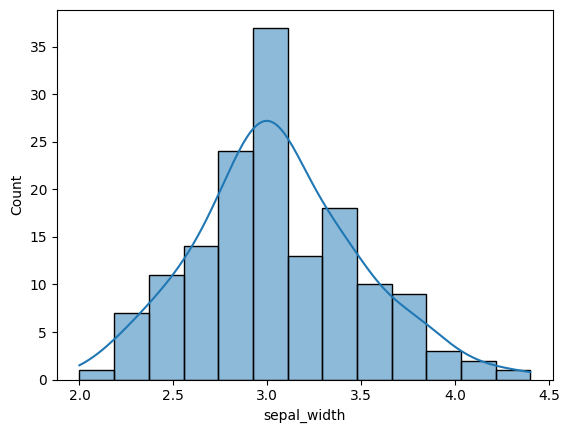

In [13]:
sns.histplot(df1['sepal_width'],kde=True)

<Axes: xlabel='count', ylabel='species'>

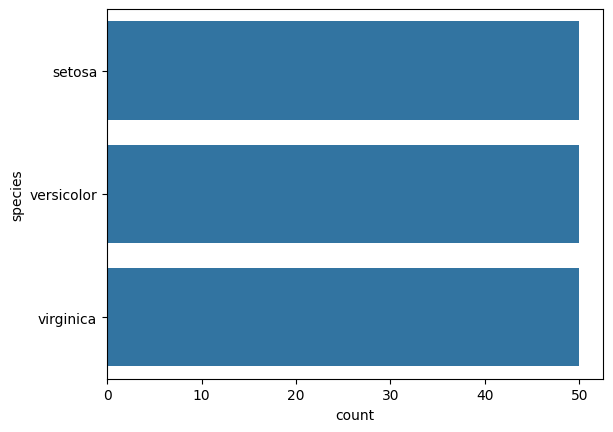

In [14]:
sns.countplot(df1['species'])

In [15]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

In [16]:
#outliers

In [17]:
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [18]:
outliers=[]
def find_outlier(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in dataset:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers
print(find_outlier(dataset))

[102, 107, 108]


IQR
1)sort the data
2)calculate Q1 AND A3
3)IQR(Q3-Q1)
4)find the lower fence(Q1-1.5(IQR))
5)find the upper fence(Q3+1.5(IQR))

In [19]:
dataset.sort()

In [20]:
q1,q3=np.percentile(dataset,[25,75])

In [21]:
print(q1,q3)

12.0 15.0


In [22]:
iqr=q3-q1
lower_fence=q1-1.5*iqr
higher_fence=q3+1.5*iqr

In [23]:
print(lower_fence,higher_fence)

7.5 19.5


In [24]:
from statsmodels.stats.weightstats import ztest as ztest
data=[88,92,94,96,97,97,97,99,99,105,109,109,109,110,112,112,113,114,115]

In [25]:
ztest(data,value=100)

(1.809562861588546, 0.07036360357311018)

In [26]:
#t test

In [27]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [28]:
ages_mean=np.mean(ages)
ages_mean

30.34375

In [29]:
sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample

array([18, 50, 26, 25, 43, 26, 25, 55, 35, 17])

In [30]:
from scipy.stats import ttest_1samp
ttest_1samp(age_sample,30)

TtestResult(statistic=0.47824329110736036, pvalue=0.6438800672466971, df=9)

In [31]:
#consider another example
#ages of the college students(population)
#1 class student mean of all the ages
import math
import scipy.stats as stats
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [32]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45], dtype=int64)

In [33]:
classA_ages.mean()

46.9

In [34]:
_,p_value=ttest_1samp(classA_ages,popmean=school_ages.mean())

In [35]:
school_ages.mean()

53.303333333333335

In [36]:
if p_value>0.05:
    print('Accept H0')
else:
    print('Reject H0')


Reject H0


In [37]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


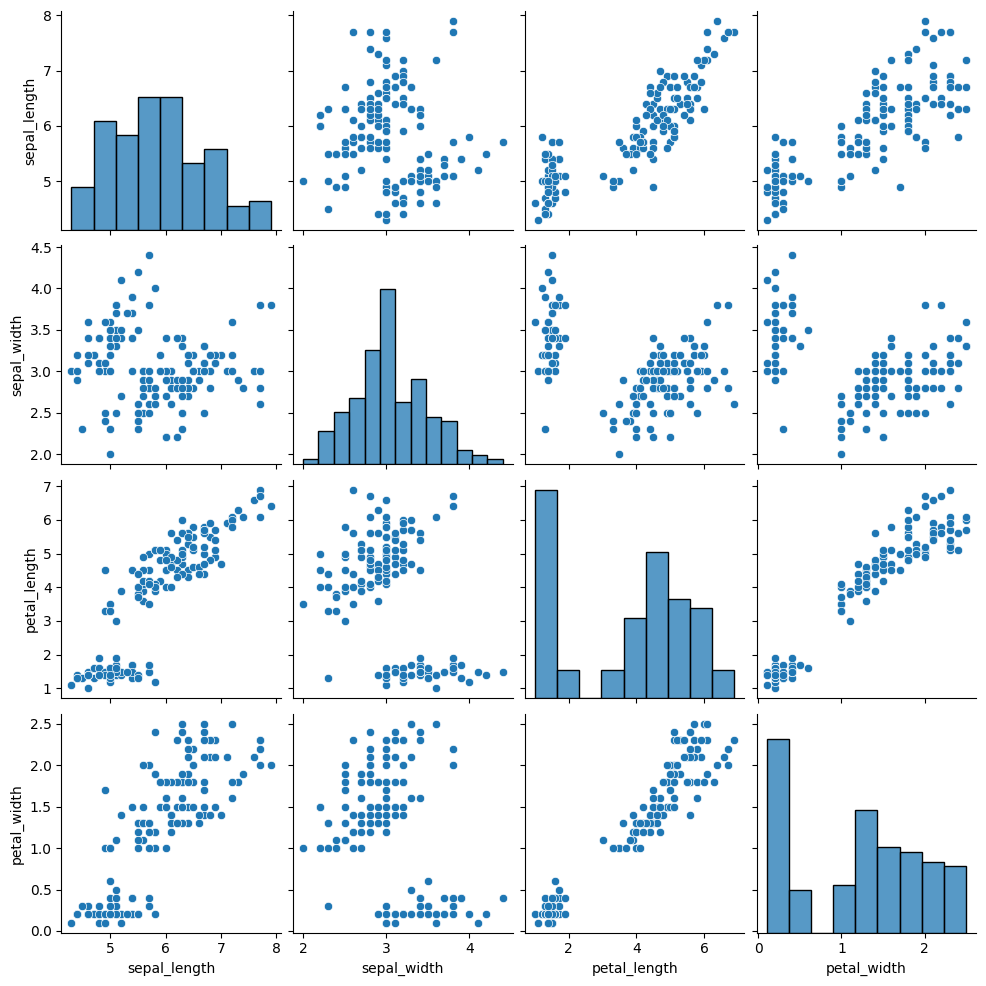

In [38]:
sns.pairplot(df)

In [39]:
#Poisson Distribution

In [40]:
from math import factorial as f
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns
print(poisson.pmf(k=0,mu=2))

0.1353352832366127


In [41]:
#Binomial Distribution for combination and permutation

In [42]:
from scipy.stats import binom
from itertools import combinations as cmb
from itertools import permutations as pmb
d=[1,2,3,4]
r=pmb(d,2)
re=[i for i in r]
print(re)

[(1, 2), (1, 3), (1, 4), (2, 1), (2, 3), (2, 4), (3, 1), (3, 2), (3, 4), (4, 1), (4, 2), (4, 3)]


In [43]:
r1=cmb(d,2)
res=[i for i in r1]
print(res)

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [44]:
#Normal Distribution

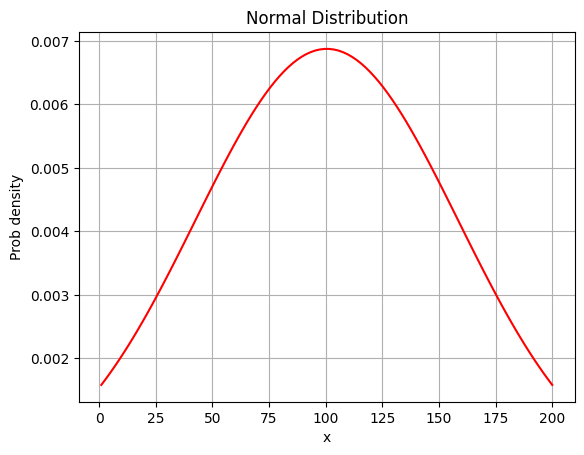

In [45]:
x=np.linspace(1,200,100)
def normal_dist(x,mean,sd):
    prob=np.exp(-0.5*((x-mean)/sd)**2)*1/(sd*np.sqrt(2*np.pi))
    return prob
mean=np.mean(x)
std=np.std(x)
pdf=normal_dist(x,mean,std)
plt.plot(x,pdf,color='red')
plt.title('Normal Distribution')
plt.xlabel('x')
plt.ylabel('Prob density')
plt.grid()
plt.show()

In [46]:
#Hypothesis Testing with one sample ztest

In [47]:
from statsmodels.stats.weightstats import ztest
d1=pd.DataFrame(np.random.randint(20,50,40),columns=['x'])
alpha=0.05
z,p=ztest(d1['x'],value=40)
print(z,p)
if p<(alpha/2):
    print('H1 accepted')
else:
    print('H0 accepted')

-4.025427620801761 5.6871871754681833e-05
H1 accepted


In [53]:
#Hypothesis Testing

In [55]:
from scipy.stats import ttest_ind, chi2_contingency
data = {'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)
# Two-sample t-test
group1 = df['A']
group2 = df['B']
t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
print(f'Two-sample t-test: t-statistic = {t_stat}, p-value = {p_val}')

# Chi-square test
data = {'Category': ['A', 'B', 'A', 'C', 'B'], 'Outcome': [1, 0, 1, 0, 1]}
df_chi = pd.DataFrame(data)
contingency_table = pd.crosstab(df_chi['Category'], df_chi['Outcome'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square test: chi2 = {chi2}, p-value = {p}')

Two-sample t-test: t-statistic = -3.7994267415435763, p-value = 0.005240940516978861
Chi-square test: chi2 = 2.9166666666666665, p-value = 0.2326236579172927


In [56]:
#Probability Distributions

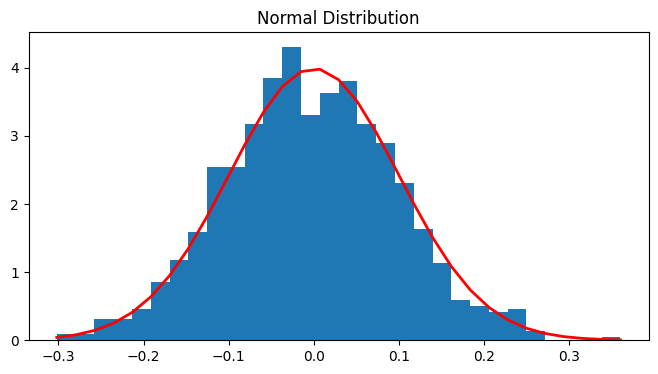

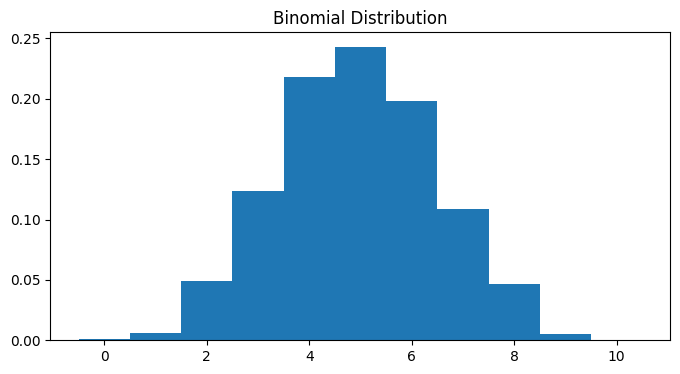

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Plotting normal distribution
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)

plt.figure(figsize=(8, 4))
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp(-(bins - mu)**2 / (2 * sigma**2)),
         linewidth=2, color='r')
plt.title('Normal Distribution')
plt.show()

# Plotting binomial distribution
n, p = 10, 0.5
s = np.random.binomial(n, p, 1000)

plt.figure(figsize=(8, 4))
plt.hist(s, bins=np.arange(0, 12) - 0.5, density=True)
plt.title('Binomial Distribution')
plt.show()
